In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('kaggle_survey_2020_responses.csv')
# Delete the 2nd row in the DataFrame (note indices starting from 0)
df = df.drop(df.index[0])

C:\Users\Windows10\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [94]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


# 1. Which countries have most number of data scientist?(overall vs Experienced) 

A Overall

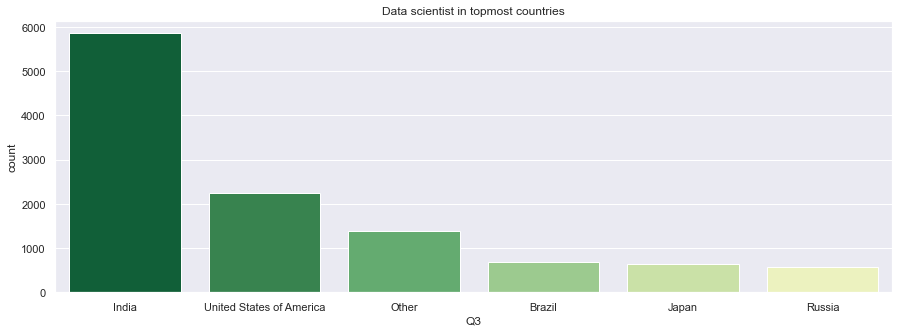

In [284]:
plt.figure(figsize=(15,5))
sns.countplot(
    x='Q3', data=df, palette = 'YlGn_r', order = df.Q3.value_counts().iloc[:6].index
).set(title='Data scientist in topmost countries')
plt.show()

B Experienced

In [98]:
def experience(year):
    if year == '10-20 years' or year == '20+ years':
        return 'Proffesional'
    elif year == '5-10 years' or year == '3-5 years':
        return 'intermediate'
    else:
        return 'Beginner'
exp = df['Q6'].apply(experience)


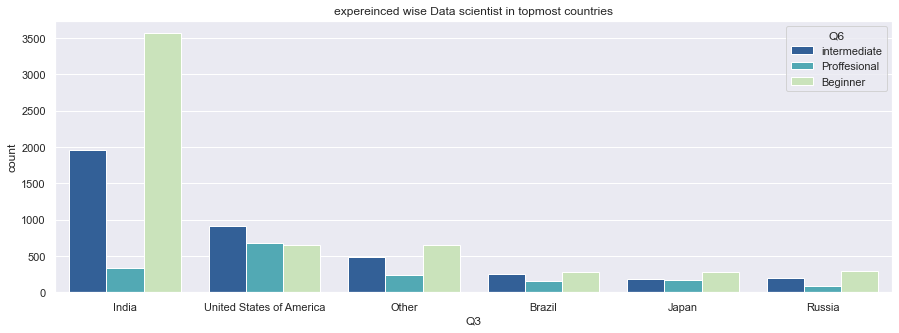

In [288]:
plt.figure(figsize=(15,5))
sns.countplot(
    x='Q3', hue =exp, data=df, palette = 'YlGnBu_r', order = df.Q3.value_counts().iloc[:6].index
).set(title='expereinced wise Data scientist in topmost countries')
plt.show()

# 2. Which Programing Language recomended most for aspiring data scientist?

In [95]:
df['Q5'].unique()

array(['Student', 'Data Engineer', 'Software Engineer', 'Data Scientist',
       'Data Analyst', 'Research Scientist', 'Other',
       'Currently not employed', 'Statistician',
       'Product/Project Manager', 'Machine Learning Engineer', nan,
       'Business Analyst', 'DBA/Database Engineer'], dtype=object)

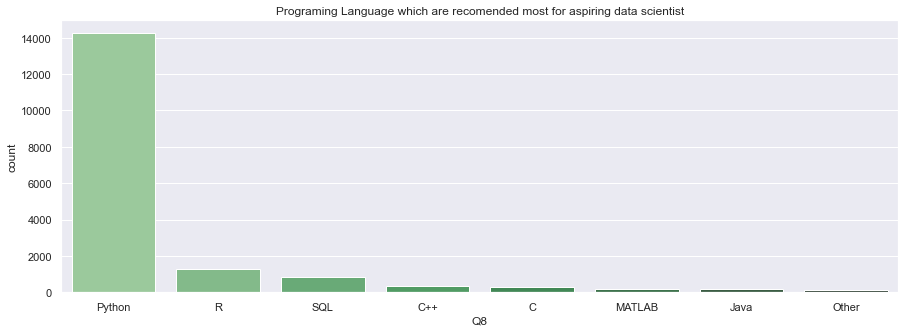

In [282]:
fig = plt.figure(figsize=(15,5))
sns.countplot(
    x='Q8', data=df, palette = 'Greens_d', order=df.Q8.value_counts().iloc[:8].index
).set(title='Programing Language which are recomended most for aspiring data scientist')
plt.show()

# 3. Which integrated development environments (IDE's) is most popular

In [100]:
q9 = {}
for i in range(1, 12):
    q9.update(dict(df[f'Q9_Part_{i}'].value_counts()))
q9 = pd.DataFrame(q9.items(), columns=['language', 'total'])

In [101]:
q9

,language,total
0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",11211
1,RStudio,3826
2,Visual Studio,2445
3,Visual Studio Code (VSCode),5873
4,PyCharm,5099
5,Spyder,3290
6,Notepad++,3132
7,Sublime Text,2452
8,Vim / Emacs,1502
9,MATLAB,1604


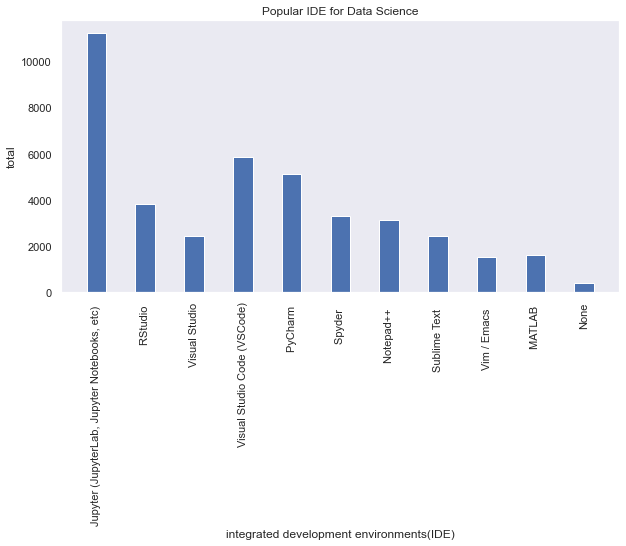

In [149]:
fig = plt.figure(figsize = (10,5))
plt.bar(q9['language'], q9['total'], width = 0.4)
plt.xlabel('integrated development environments(IDE)')
plt.ylabel('total')
plt.xticks(rotation='vertical')
plt.title('Popular IDE for Data Science')
plt.show()

# 4. Programming Language used on a regular basis

In [105]:
q7 = {}
for i in range(1, 12):
    q7.update(dict(df[f'Q7_Part_{i}'].value_counts()))
q7 = pd.DataFrame(q7.items(), columns=['language', 'total'])

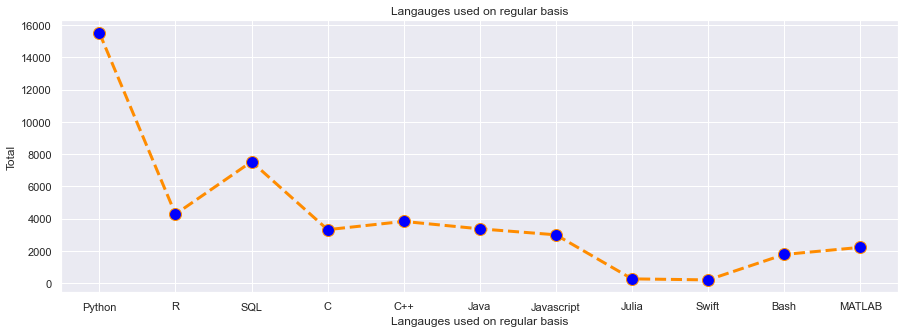

In [133]:
plt.figure(figsize=(15,5))
plt.plot(
    q7['language'], q7['total'], color='DarkOrange', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12
)
plt.xlabel('Langauges used on regular basis')
plt.ylabel('Total')
plt.title('Langauges used on regular basis')
plt.show()

# 5. ML algorithms used on a regular basis?

In [305]:
q17 = {}
for i in range(1, 12):
    q17.update(dict(df[f'Q17_Part_{i}'].value_counts()))
q17 = pd.DataFrame(q17.items(), columns=['ML_Algorithm', 'total'])

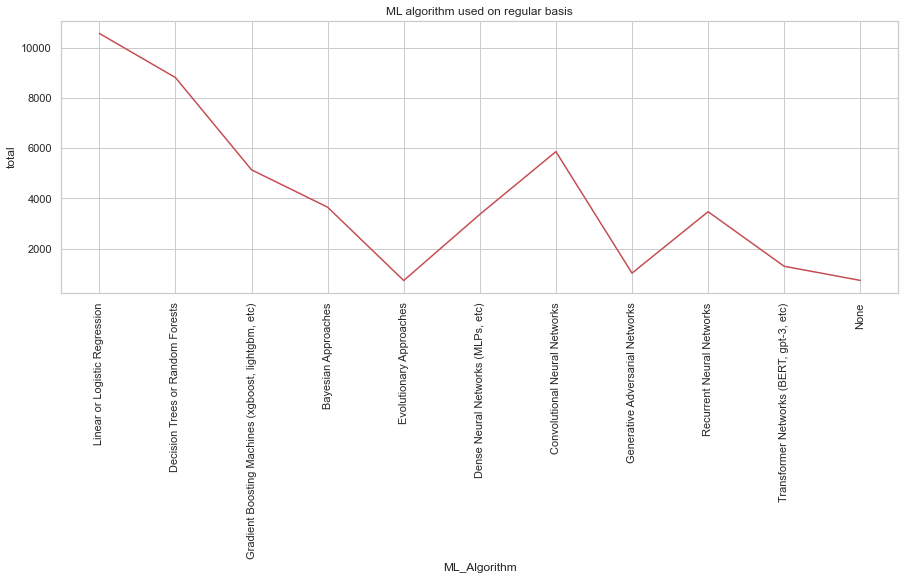

In [309]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
sns.set(style='whitegrid')
sns.lineplot(x='ML_Algorithm', y='total', data=q17,color='r')
plt.title('ML algorithm used on regular basis')
plt.xticks(rotation=90)
plt.show()

# 6. Business intelligence tools used on regular basis?

In [226]:
q31 = {}
for i in range(1, 14):
    q31.update(dict(df[f'Q31_A_Part_{i}'].value_counts()))
q31 = pd.DataFrame(q31.items(), columns=['BI_tool', 'total'])

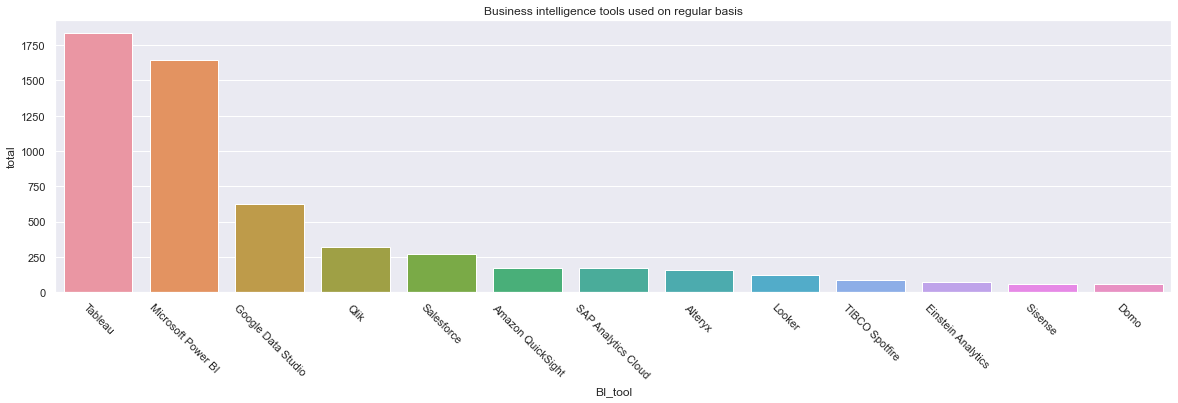

In [302]:
plt.figure(figsize=(20,5))
plot_order = q31.sort_values(by='total',ascending=False).BI_tool.values
sns.set(style='darkgrid')
sns.barplot(x='BI_tool', y='total', data=q31, order=plot_order)
plt.title('Business intelligence tools used on regular basis')
plt.xticks(rotation=-45)
plt.show()

# 7. Platform where Publicly share or deploy data analysis or machine learning model.

In [234]:
q36 = {}
for i in range(1, 10):
    q36.update(dict(df[f'Q36_Part_{i}'].value_counts()))
q36 = pd.DataFrame(q36.items(), columns=['Platform', 'total'])

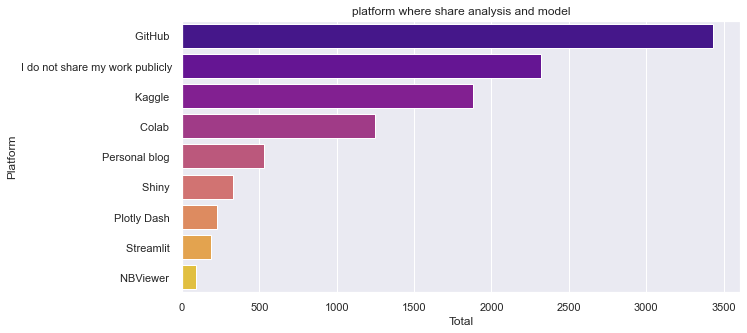

In [259]:
plt.figure(figsize =(10,5))
plot_order = q36.sort_values(by='total',ascending=False).Platform.values
sns.barplot(x='total', y='Platform', data=q36, order=plot_order, palette='plasma')
plt.ylabel('Platform')
plt.xlabel('Total')
plt.title('platform where share analysis and model')
plt.show()

# 8. Which age group participated the most in the survey?

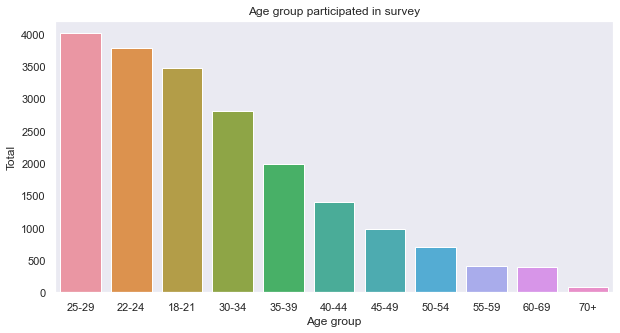

In [150]:
plt.figure(figsize=(10,5))
sns.countplot(x='Q1', data=df, order = df.Q1.value_counts().iloc[:i].index)
plt.xlabel('Age group')
plt.ylabel('Total')
plt.title('Age group participated in survey')
plt.show()

# 9. Participate by diffrent proffesion people in the survey.

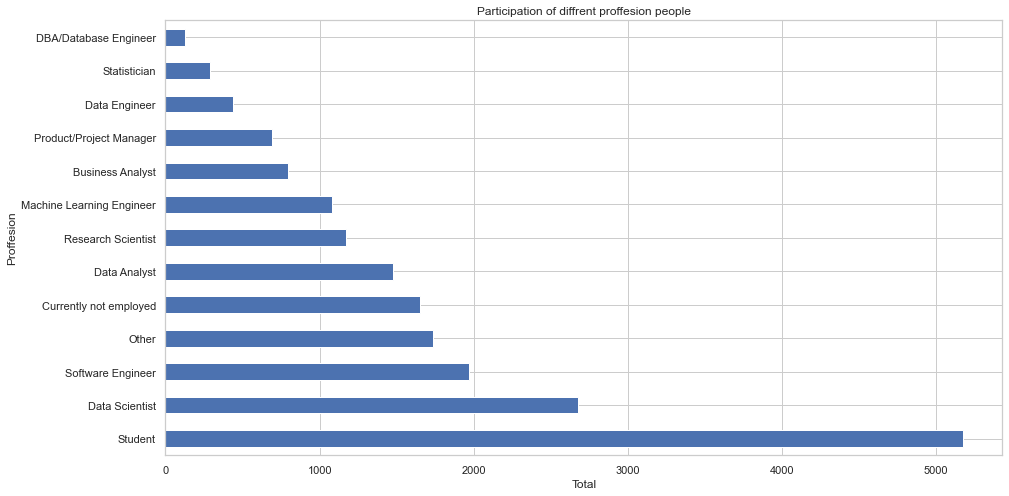

In [312]:
plt.figure(figsize =(15,8))
df['Q5'].value_counts().plot(kind='barh')
plt.ylabel('Proffesion')
plt.xlabel('Total')
plt.title('Participation of diffrent proffesion people')
plt.show()

# 10. Natural language processing (NLP) methods used on regular basis

In [318]:
q19 = {}
for i in range(1, 6):
    q19.update(dict(df[f'Q19_Part_{i}'].value_counts()))
q19 = pd.DataFrame(q19.items(), columns=['NLP', 'total'])

In [319]:
q19

,NLP,total
0,"Word embeddings/vectors (GLoVe, fastText, word...",2110
1,"Encoder-decorder models (seq2seq, vanilla tran...",1514
2,"Contextualized embeddings (ELMo, CoVe)",557
3,"Transformer language models (GPT-3, BERT, XLne...",1428
4,None,1047


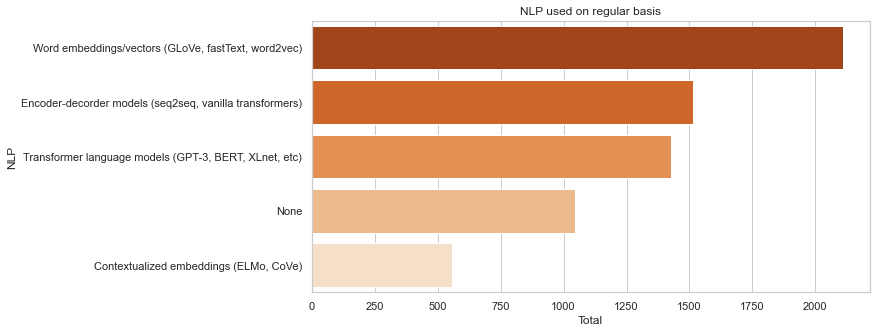

In [329]:
plt.figure(figsize =(10,5))
plot_order = q19.sort_values(by='total',ascending=False).NLP.values
sns.barplot(x='total', y='NLP', data=q19, order=plot_order, palette='Oranges_r')
plt.ylabel('NLP')
plt.xlabel('Total')
plt.title('NLP used on regular basis')
plt.show()